In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from pprint import pprint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from datetime import date


In [2]:
musics = []
file = open("vevo_en_videos_60k.json",'r')
for line in file.readlines():
    musics.append(json.loads(line))
    

In [3]:
topics = []
for i in range(len(musics)):
    for topic in musics[i]['topics']:
        if topic not in topics:
            topics.append(topic)
topics.remove('Music')
topics.remove('Pop_music')
print(topics)

['Electronic_music', 'Rhythm_and_blues', 'Country_music', 'Soul_music', 'Reggae', 'Independent_music', 'Rock_music', 'Hip_hop_music', 'Music_of_Latin_America', 'Military', 'Jazz', 'Television_program', 'Christian_music', 'Music_of_Asia', 'Classical_music', 'Entertainment', 'Performing_arts', 'Film']


In [4]:
min_date = date(2200,1,1)
max_date = date(1900,1,1)
for i in range(len(musics)):
    d = date.fromisoformat(musics[i]['insights']['startDate'])
    if d < min_date:
        min_date = d
    if d > max_date:
        max_date = d

2015-10-23
MKTO - Heartbreak Holiday (Acoustic Version)


'\n2446\n8886\n11823\n30154\n46439\n50129\n56198\n56248\n'

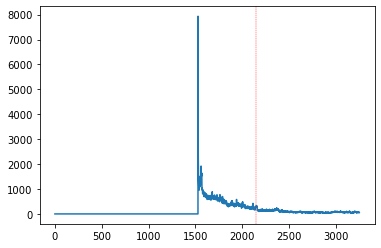

In [80]:
# Hello - 57722 2015.10.23 released

idx = 6699
print( date.fromisoformat(musics[57722]['insights']['startDate']))
print( musics[idx]['snippet']['title'])
p = np.zeros(3252)
delta = date.fromisoformat(musics[idx]['insights']['startDate']) - min_date
p[delta.days:] = musics[idx]['insights']['dailyView']
plt.plot(np.arange(3252),p)
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')

'''
2446
8886
11823
30154
46439
50129
56198
56248
'''

In [81]:
def plott(idx):
    print( musics[idx]['snippet']['title'])
    p = np.zeros(3252)
    delta = date.fromisoformat(musics[idx]['insights']['startDate']) - min_date
    p[delta.days:] = musics[idx]['insights']['dailyView']
    plt.plot(np.arange(3252),p)
    plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')

60740


NameError: name 'sum_views' is not defined

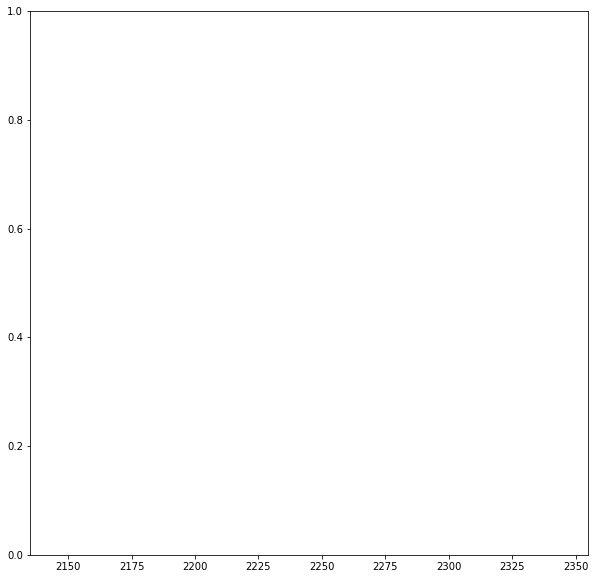

In [6]:
selected = []
for i in range(len(musics)):
    try:
        if 'Music' in musics[i]['topics']:
            selected.append(musics[i])
    except BaseException:
        continue

views_selected = np.zeros((len(selected),3252))
print(len(views_selected))
for i in range(len(selected)):
    delta = date.fromisoformat(selected[i]['insights']['startDate']) - min_date
    views_selected [i][delta.days:] = selected[i]['insights']['dailyView']
sum_views_selected = np.sum(views_selected ,axis=0)
plt.figure(1,[10,10])
plt.xlim(2135,2355)
plt.plot(np.arange(sum_views.shape[0]),sum_views_selected)
plt.plot(np.arange(sum_views.shape[0]),sum_views_adele)
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')


In [ ]:
plt.figure(2,[10,10])
plt.xlim(2000,2500)
plt.plot(np.arange(sum_views.shape[0]-6),convolution(sum_views_selected))
plt.plot(np.arange(sum_views.shape[0]-6),convolution(sum_views_adele))
plt.xlabel('date')
plt.ylabel('daily views')
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')
plt.axvline(x=2145-6,color ='r',lw = '0.4',ls = '--')

In [7]:
topic_dailyView = np.zeros((len(topics),3252))
for j in range(len(musics)):
    for i in range(len(topics)):
        if topics[i] in musics[j]['topics']:
            delta = date.fromisoformat(musics[j]['insights']['startDate']) - min_date
            topic_dailyView[i,delta.days:] += musics[j]['insights']['dailyView']
            break

1


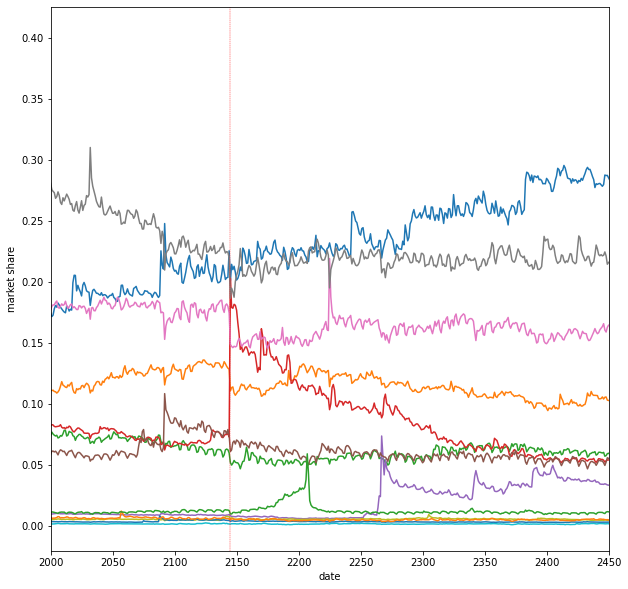

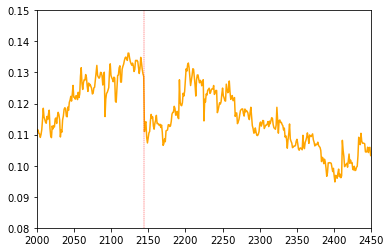

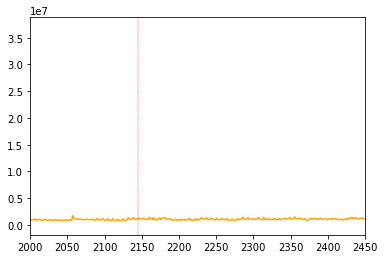

In [8]:
sum_topic_view = np.sum(topic_dailyView,axis = 0)
print(np.argsort(topic_dailyView[:,100])[::-1][0])
topic_market_share = topic_dailyView/sum_topic_view
plt.figure(3,[10,10])
for i in range(13):
    plt.plot(np.arange(3252),topic_market_share[i,:])

plt.xlim(2000,2450)
plt.xlabel("date")
plt.ylabel("market share")
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')


plt.figure(10)
plt.xlim(2000,2450)
plt.ylim(0.08,0.15)
plt.plot(np.arange(3252),topic_market_share[1,:],c='orange')
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')


plt.figure(11)
plt.xlim(2000,2450)
plt.plot(np.arange(3252),topic_dailyView[11,:],c='orange')
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')

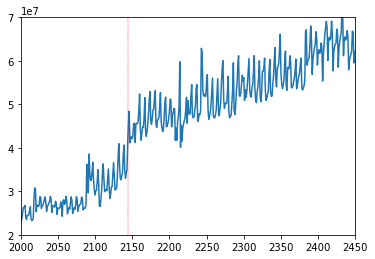

In [9]:
plt.figure(15)
plt.xlim(2000,2450)
plt.ylim(2e7,7e7)
plt.plot(np.arange(3252),topic_dailyView[0,:])
plt.axvline(x=2145,color ='r',lw = '0.4',ls = '--')
#plt.axvline(x=2145-6,color ='r',lw = '0.4',ls = '--')

In [12]:
#derivative of convolution
dconv = np.zeros((len(musics),3252-7-1))
for i in range(len(musics)):
    delta = date.fromisoformat(musics[i]['insights']['startDate']) - min_date
    cov = convolution(musics[i]['insights']['dailyView'])
    dconv[i,delta.days:] = cov[1:cov.shape[0]] -  cov[0:cov.shape[0]-1]

In [13]:
nor_dconv = np.divide(dconv,np.sum(np.abs(dconv),axis=1).reshape((60740,1)))
zero_count = np.zeros(dconv.shape[0])
for i in range(dconv.shape[0]):
    for j in range(dconv.shape[1]):
        if dconv[i,j] != 0:
            zero_count[i]=j
            break

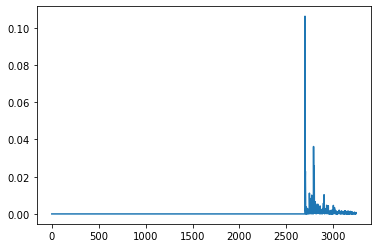

In [14]:
plt.plot(np.arange(3244),np.abs(nor_dconv[59140,:]))

In [30]:
for i in range(dconv.shape[0]):
    if nor_dconv[i][2145]>0.01:
        print(i)

3071
3088
3147
6475
6675
10403
11434
12559
13602
15316
16648
18357
19965
21397
24104
24438
25083
29641
30413
30666
31831
33536
33697
35317
43242
46318
47922
48423
48864
50011
51340
52233
53450
53729
54373
54935
55370
56410
57094
58469
60446


In [22]:
for i in range(dconv.shape[0]):
    abs_diff = np.abs(np.abs(nor_dconv[57722]) - np.abs(nor_dconv[i]))
    #abs_diff = nor_dconv[57722]*nor_dconv[i]
    diff_val = np.sum(abs_diff[int(max(zero_count[i],zero_count[57722])):])
    if diff_val < 0.8:
        print(i)

2103
11823
12186
13709
15440
15636
15741
15755
16069
17058
17777
18479
18741
18757
18781
19723
19940
19954
21521
21995
22709
22920
22984
24414
25874
26124
27449
27772
27862
29387
29448
29622
30895
31105
31912
33354
34139
34517
35648
36978
37428
37552
40010
40581
40878
41196
41265
42357
43242
44362
46113
46644
47664
47779
48615
48649
49798
50866
51839
52336
52715
53214
53481
53705
54714
55370
55653
55750
57722
57752
58789
59874


(160000000.0, 253530910.95000002)

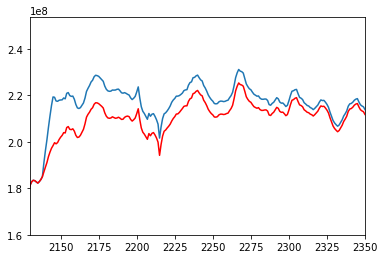

In [482]:
plt.plot(np.arange(sum_views.shape[0]-6),convolution(sum_views))
hello_views = np.zeros(3252)
hello_views[2145:] = musics[57722]['insights']['dailyView']
plt.plot(np.arange(sum_views.shape[0]-6),convolution(sum_views) - convolution(hello_views),c='r')
plt.xlim(2130,2350)
plt.ylim(1.6e8)

(150000000.0, 320000000.0)

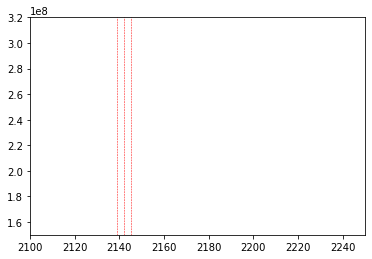

In [11]:
def convolution(signal):
    signal = np.array(signal)
    fil = np.ones(7)
    ans = np.zeros(signal.shape[0]-7)
    for i in range(3,signal.shape[0]-4):
        ans[i-3] = np.average(signal[i-3:i+4]*fil)
    return ans
plt.axvline(x=2145-3,color ='r',lw = '0.5',ls = '--')
plt.axvline(x=2145,color ='r',lw = '0.5',ls = '--')
plt.axvline(x=2145-6,color ='r',lw = '0.5',ls = '--')
plt.xlim(2100,2250)
plt.ylim(1.5*1e8,3.2*1e8)
#plt.plot(np.arange(sum_views.shape[0]-7),convolution(sum_views))

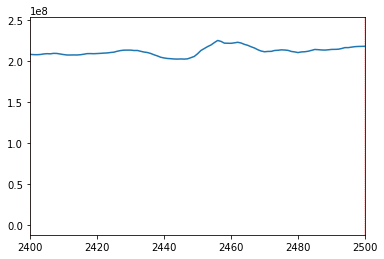

In [366]:
plt.axvline(x=2400,color ='r',lw = '0.4',ls = '--')
plt.axvline(x=2500,color ='r',lw = '0.4',ls = '--')
plt.xlim(2400,2500)
plt.plot(np.arange(sum_views.shape[0]-6),convolution(sum_views))

In [148]:
max_date = date(2000,1,1)
min_date = date(2200,1,1)
Adeles = []

for i in range(len(musics)):
    if max_date < date.fromisoformat(musics[i]['insights']['startDate']):
        max_date = date.fromisoformat(musics[i]['insights']['startDate'])
for i in range(len(musics)):
    if min_date > date.fromisoformat(musics[i]['insights']['startDate']):
        min_date = date.fromisoformat(musics[i]['insights']['startDate'])

In [283]:
Adeles = []
for i in range(len(musics)):
    try:
        if "Adele" in musics[i]['snippet']['tags']:
            Adeles.append(musics[i])
    except BaseException:
        continue

In [284]:
views = np.zeros((len(Adeles),3252))
for i in range(len(Adeles)):
    delta = date.fromisoformat(Adeles[i]['insights']['startDate']) - min_date
    views[i][delta.days:] = Adeles[i]['insights']['dailyView']

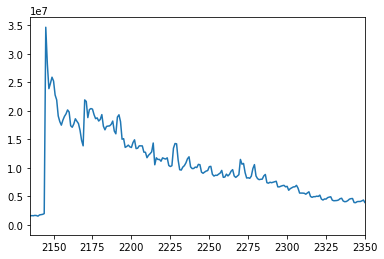

In [318]:
sum_views_adele = np.sum(views,axis=0)
plt.xlim(2135,2350)
plt.plot(np.arange(sum_views.shape[0]),sum_views_adele)

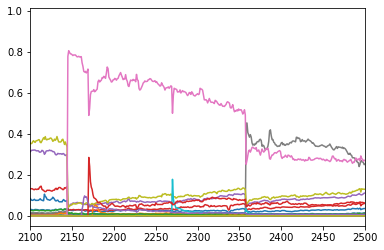

In [624]:
market_share = views/sum_views_adele
plt.xlim(2100,2500)
for i in range(len(Adeles)):
    plt.plot(np.arange(sum_views.shape[0]),market_share[i,:])

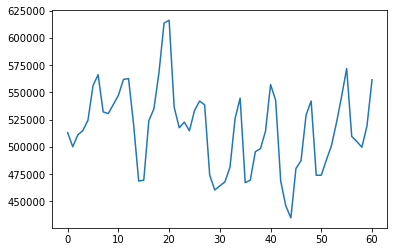

In [43]:
daily_views = pd.read_csv("vevo_forecast_data_60k.tsv",header = None)
daily_views = daily_views.drop(0,axis=1)
daily_views = daily_views.drop(62,axis=1)
daily_views = daily_views.to_numpy()
plt.plot(np.arange(61),daily_views[33553,:])

In [58]:
s_t = pd.read_csv("persistent_network.csv")
s_t = s_t.to_numpy()

In [59]:
sum_views = np.sum(daily_views,axis = 0)
print(sum_views)

[317613875 311707298 311567135 318761743 324337675 353428454 356841434
 313186094 304658937 310491592 311637833 318508111 338901061 342870527
 295451817 291941744 298289139 302228030 307674884 335409307 344340486
 295547050 291128434 300105856 303141024 308825776 331329244 339682276
 293503371 289477889 298220633 300506610 306274907 328532881 329487930
 282275514 283570709 290670419 298726674 308758043 330853712 332754068
 289013080 283356104 272970080 299338933 305816192 327987393 330409538
 283721348 282585699 292171612 296350547 305003535 324431929 328126909
 279398613 281024349 291060787 292533157 301810437]


In [60]:
def SMAPE(x,y):
    #return np.linalg.norm(x-y)
    #print(x.shape[0])
    return (200/(y.shape[0]))*np.sum(np.abs(x-y)/(np.abs(x+1e-6)+np.abs(y+1e-6)))

[(6699, 24, 2), (26411, 18, 4), (12566, 26, 15), (15496, 9, 0), (8470, 17, 2), (6851, 48, 22), (38015, 24, 13), (4136, 21, 55), (126, 45, 10), (57685, 19, 26), (20536, 20, 3), (799, 14, 16), (31439, 12, 20), (33264, 12, 15), (19245, 48, 22), (49588, 15, 10), (52348, 31, 34), (43166, 27, 11)]
60740
Jennifer Love Hewitt - Can I Go Now


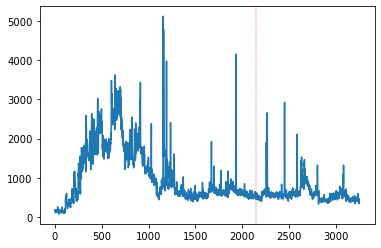

In [107]:
import pickle
with open('./network_pickle/network_2018-09-01.p', 'rb') as f:
    x = pickle.load(f)
print(x[57722])
print(len(x))
plott(26411)

In [61]:
tr1  = sum_views[0:50]
ts1  = sum_views[50:]
res = AutoReg(tr1,7).fit()

In [62]:
res.predict(start = 1,end = 10)

array([3.09911780e+08, 3.02070244e+08, 3.01636578e+08, 3.10160568e+08])

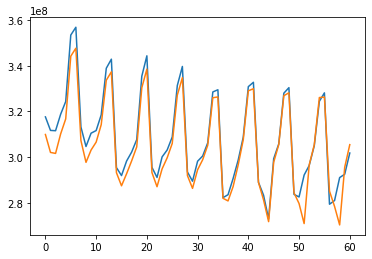

In [63]:
plt.plot(np.arange(61),sum_views)
plt.plot(np.arange(61),res.predict(start = 0,end = 67))

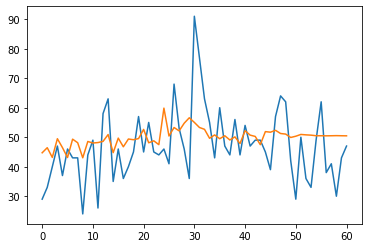

In [67]:
tr2 = daily_views[100,:50]
res2 = AutoReg(tr2,7).fit()
plt.plot(np.arange(61),daily_views[100,:])
plt.plot(np.arange(61),res2.predict(start = 0,end = 67))

In [70]:
# Studying a subset
connect_with_1 = [57720]
for j in range(1):
    for i in range(s_t.shape[0]):
        if s_t[i,0] == connect_with_1[j]:
            connect_with_1.append(s_t[i,1])
        if s_t[i,1] == connect_with_1[j]:
            connect_with_1.append(s_t[i,0])
connect_with_1= list(set(connect_with_1))            
print(connect_with_1)

[57720, 8552, 57334]


53.39368934680258


<ipython-input-66-6477bdb9af4c>:8: RuntimeWarning: invalid value encountered in true_divide
  sub_market = sub_market/np.sum(sub_market,axis = 0)


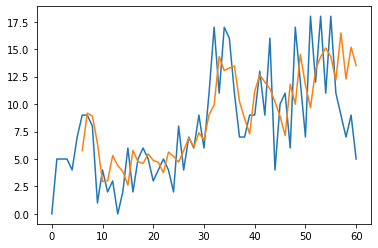

In [66]:
subset_sum = np.zeros(61)
for index in connect_with_1:
    subset_sum += daily_views[index,:] 
tr3 = subset_sum[0:56]
res3 = AutoReg(tr3,7).fit()
sub_market = daily_views[connect_with_1,:]
sub_market = np.add.accumulate(sub_market, 1)
sub_market = sub_market/np.sum(sub_market,axis = 0)


plt.plot(np.arange(61),subset_sum)
plt.plot(np.arange(55)+6,res3.predict(start = 0,end = 61))
print(SMAPE(subset_sum[56:],res3.predict(start = 0,end = 61)[50:]))

[ 0 10  8  2  9  5 11  3  6  1  7  4 12]


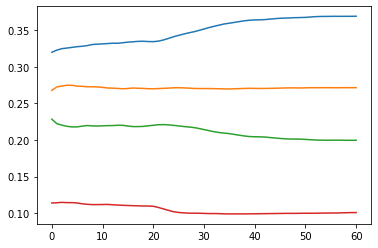

In [47]:
indices = np.argsort(sub_market[:,60])[::-1]
for i in indices[0:4]:
    plt.plot(np.arange(61),sub_market[i,:])
print(indices)

In [40]:
def features(x):
    return np.array([np.ones(x.shape[0]),x,x**2]).T

In [41]:
err1 = 0
err2 = 0

pred_share = np.zeros((len(connect_with_1),61))
lr1 = LinearRegression().fit(features(np.arange(46)+10),sub_market[:,10:56].T)
pred_share = lr1.predict(features(np.arange(61))).T
#pred_share = pred_share/np.sum(pred_share,axis =0)
for idx in range(len(connect_with_1)):
    pred1 = pred_share[idx,6:]*res3.predict(start = 1,end = 61)
    #print(pred1[50:])
    err1 += SMAPE(pred1[50:],daily_views[connect_with_1[idx],56:])
    #print(idx)
    print(SMAPE(pred1[50:],daily_views[connect_with_1[idx],56:]))
    tr4 = daily_views[connect_with_1[idx],:56]
    res4 = AutoReg(tr4,7).fit()
    pred2 = res4.predict(start = 0,end = 61)
    err2 += SMAPE(pred2[50:],daily_views[connect_with_1[idx],56:])
    
print("### choice model")
print(err1)
print("### AR")
print(err2)

184.28353718618376
### choice model
184.28353718618376
### AR
184.28353718618376


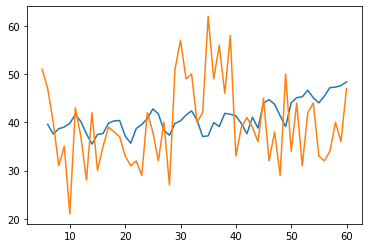

In [2584]:
index = 2
plt.plot(np.arange(61)[6:],pred_share[index ,6:]*res3.predict(start = 0,end = 61))
plt.plot(np.arange(61)[5:],daily_views[connect_with_1[index],5:])
#plt.plot(np.arange(61),res4.predict(start = 0,end = 67))

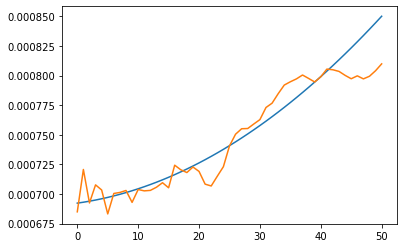

In [2593]:
plt.plot(np.arange(51),pred_share[9,10:61])
plt.plot(np.arange(51),sub_market[9,10:61])

In [2569]:
errs_AR = np.zeros(daily_views.shape[0])
errs_CM = np.zeros(daily_views.shape[0])
idxes = np.arange(daily_views.shape[0])

for start in idxes:
    if start == -1:
        continue
    connect_with_start = [start]
    j = 0
    while j<1 and len(connect_with_start) > j:
        for i in range(s_t.shape[0]):
            if s_t[i,0] == connect_with_start[j]:
                connect_with_start.append(s_t[i,1])
            if s_t[i,1] == connect_with_start[j]:
                connect_with_start.append(s_t[i,0])
        j+=1
    connect_with_start= list(set(connect_with_start))
    idxes[connect_with_start] = -1
    if len(connect_with_start) == 1:
        continue
    
    subset_sum = np.zeros(61)
    for index in connect_with_start:
        subset_sum += daily_views[index,:] 
    tr3 = subset_sum[0:56]
    res3 = AutoReg(tr3,7).fit()
    
    #if SMAPE(subset_sum[56:],res3.predict(start = 0,end = 67)[56:])>10:
     #   continue
    
    sub_market = daily_views[connect_with_start,:]
    sub_market = sub_market+1e-3
    sub_market = np.add.accumulate(sub_market, 1)
    sub_market = sub_market/np.sum(sub_market,axis = 0)
    pred_share = np.zeros((len(connect_with_start),61))
    
    lr1 = LinearRegression().fit(features(np.arange(46)+10),sub_market[:,10:56].T)
    pred_share = lr1.predict(features(np.arange(61))).T
    
    
    for idx in range(len(connect_with_start)):
        if errs_AR[connect_with_start[idx]]== 0:
            pred1 = pred_share[idx,6:]*res3.predict(start = 0,end = 61)
            errs_CM[connect_with_start[idx]] = SMAPE(pred1[50:],daily_views[connect_with_start[idx],56:])
            
            tr4 = daily_views[connect_with_start[idx],:56]
            res4 = AutoReg(tr4,7).fit()
            pred2 = res4.predict(start = 0,end = 61)
            errs_AR[connect_with_start[idx]]= SMAPE(pred2[50:],daily_views[connect_with_start[idx],56:])
            if errs_CM[connect_with_start[idx]] < errs_AR[connect_with_start[idx]] - 20:
                print(connect_with_start[idx])
    if start> 500:
        break

3
52430
2359
59
45848
118
32362
56503
161
37068
14139
37832
28671
10504
34212
45138
8736
474


In [2570]:
err1 = 0
err2 = 0
count = 0
for i in range(len(errs_CM)):
    if errs_CM[i]>0 and errs_AR[i]> 0:
        err1+= errs_CM[i]
        err2+= errs_AR[i]
        count+=1
print(err1/count)
print(err2/count)

34.233687955261175
32.21968031998249
